In [49]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sb
import statsmodels.formula.api as smf # Create Statistic Models using formula api

pd.options.display.float_format = '{:.5f}'.format

%matplotlib inline


In [29]:

%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>


In [4]:
#Import RI Population Training data

dir_path = os.path.join(os.path.pardir, "data", "interim")
train_file = os.path.join(dir_path,"population_ri_train.csv")

train_df = pd.read_csv(train_file)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
Year          7 non-null int64
Population    7 non-null int64
dtypes: int64(2)
memory usage: 192.0 bytes


In [5]:
X, y = train_df["Year"], train_df["Population"]

In [6]:
# Split Training data into subsets - train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [7]:
# Create a Baseline Linear Regression Model

# Dummy Regressor
dummy_mean = DummyRegressor(strategy="mean")
dummy_mean

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [8]:
# Train/Fit Dummy Regressor

dummy_mean.fit(X_train, y_train)

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [9]:
dummy_mean.predict(X_test)

array([1053781.6, 1053781.6])

In [10]:
dummy_mean.score(X_test, y_test) # Negative R2 score means Dummy (Baseline) Model is arbitarily worse

-0.2503689303354435

In [11]:
# Need to reshape the train-test data since there is only one feature for training/prediction
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

#X_train_std = scalar.fit_transform(X_train)
#X_test_std = scalar.fit_trainsform(X_test)

In [12]:
X_test

array([[2016],
       [2012]], dtype=int64)

In [13]:
# Create actual Linear Regression Model
lr_model = LinearRegression()

# Fit Linear Regr. Model
model = lr_model.fit(X_train, y_train)

In [14]:
lr_model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
lr_model.intercept_

77413.17441860447

In [16]:
lr_model.coef_

array([485.12790698])

In [86]:
77413.17441860447 + 485.12790698*2016  # Manually checking the values

1055431.0348902843

In [17]:
print(X_test)
lr_model.predict(X_test)

[[2016]
 [2012]]


array([1055431.03488372, 1053490.52325581])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


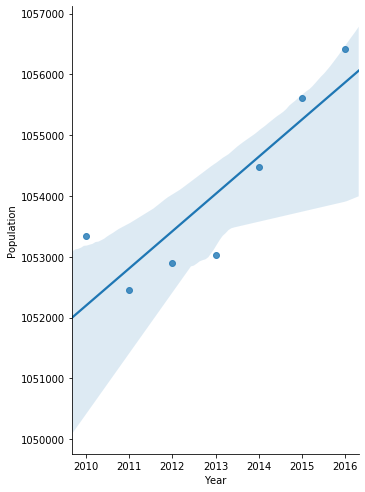

In [18]:
 sb.pairplot(train_df, x_vars="Year", y_vars="Population", size=7, aspect=0.7, kind="reg")

In [19]:
X = X.values.reshape(-1,1)

lr_model.score(X,y)

0.7339214828010495

In [23]:
# Create a Statistic Model and fit it with training data

statmodel = smf.ols(formula="Population ~ Year", data=train_df).fit()

In [24]:
statmodel

In [25]:
statmodel.params

Intercept   -179504.071428
Year            612.785714
dtype: float64

In [26]:
-179504.071428 + 612.785714*2016

1055871.927996

In [27]:
print(1056426 - 1055871.927996) # Stat Model
1056426 - 1055431.0348902843 #LR model

554.0720039999578


994.9651097157039

In [32]:
print("Stat Model Prediction {}".format(statmodel.predict(pd.DataFrame({"Year": [2016]}))))
print("LR Model Prediction {}".format(lr_model.predict(pd.DataFrame({"Year": [2016]}))))

Stat Model Prediction 0   1055871.92857
dtype: float64
LR Model Prediction [1055431.03488372]


In [33]:
1055871.927996 - 1055431.0348902843

440.89310571574606

In [34]:
statmodel.conf_int()

,0,1
Intercept,-956691.22238,597683.07952
Year,226.70188,998.86955


In [35]:
statmodel.pvalues

Intercept   0.57854
Year        0.00954
dtype: float64

In [36]:
statmodel.params

Intercept   -179504.07143
Year            612.78571
dtype: float64

In [37]:
statmodel.rsquared

0.7690133029180035

In [38]:
lr_model.score(X,y)

0.7339214828010495

In [39]:
statmodel.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Population   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     16.65
Date:                Wed, 11 Mar 2020   Prob (F-statistic):            0.00954
Time:                        09:39:35   Log-Likelihood:                -55.501
No. Observations:                   7   AIC:                             115.0
Df Residuals:                       5   BIC:                             114.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.795e+05   3.02e+05     -0.594      0.579   -9.57e+05    5.98e+05
Year         612.7857    150.193      4.080      0.010     226.702     998.870
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.110
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.338
Skew:                           0.240   Prob(JB):                        0.844
Kurtosis:                       2.036   Cond. No.                     2.03e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
sklearn.metrics.explained_variance_score(y_test,lr_model.predict(X_test))

0.7979495275852815

In [69]:
column = ["Year", "LinearPop", "StatPop"]
pd.DataFrame(predicted, columns=column)
# Convert numpy int64 array into a Pandas Df with header
column_df = ["Year"]
#X_test_df = pd.DataFrame(np.atleast_2d(X_test), columns=column_df)
#X_test_df

for index, year in pd.DataFrame(X_test).itertuples():
    predicted["Year"] = year
    predicted["LinearPop"] = lr_model.predict(pd.DataFrame(year))
    print(year)

predicted

#sklearn.metrics.mean_absolute_error(y_test, predicted)

ValueError: DataFrame constructor not properly called!

In [74]:
predicted = lr_model.predict(X_test)
predicted

array([1055431.03488372, 1053490.52325581])

In [78]:
predicted = pd.DataFrame(predicted).unstack().copy(deep=True)

In [79]:
predicted

0  0   1055431.03488
   1   1053490.52326
dtype: float64

In [80]:
import math
math.sqrt(sklearn.metrics.mean_squared_error(y_test, predicted))

817.7692986893292

In [81]:
sklearn.metrics.mean_squared_error(y_test, predicted)

668746.6258788372

In [82]:
sklearn.metrics.r2_score(y_test, predicted)

0.7847201646987295

In [83]:
# Change the numpy int64 array to 
column = ["Year"]
X_test_df = pd.DataFrame(np.atleast_2d(X_test), columns=column)


statmodel.predict(X_test)

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error evaluating factor: IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
    Population ~ Year
                 ^^^^

In [86]:
# Standardize the Training & Testing Subsets
scalar = StandardScaler()

X_train_scale = scalar.fit_transform(X_train)
X_test_scale = scalar.transform(X_test)
X_train_scale, X_test_scale

(array([[-0.86266219],
        [ 0.21566555],
        [-1.40182605],
        [ 1.29399328],
        [ 0.75482941]]), array([[ 1.83315714],
        [-0.32349832]]))

In [93]:
# Create a new model to fit/train with Standarized Data

lr_model_std = LinearRegression()
lr_model_std.fit(X_train_scale, y_train)

output = lr_model_std.predict(X_test_scale)
#score = lr_model_std.score(y_test, X_test_scale)

print(f"Scaled Years: {X_test_scale} ; Output is {output} and Score is ")


Scaled Years: [[ 1.83315714]
 [-0.32349832]] ; Output is [1055431.03488372 1053490.52325581] and Score is 


In [171]:
import numpy as np
#X_test_stack = np.column_stack(X_test)
#statpredicted = statmodel.predict(X_test_stack)
column = ["Year"]
X_test_df = pd.DataFrame(np.atleast_2d(X_test), columns=column)

X_test_df

,Year
0,2016
1,2012


In [172]:
statpredicted = statmodel.predict(X_test_df)

In [177]:
statpredicted

0   1055871.92857
1   1053420.78571
dtype: float64

In [179]:
np.median(predicted - statpredicted)

-185.57807320915163

 Mean: 1054033.5714285714 
 Skewness: 0.7408579892540001


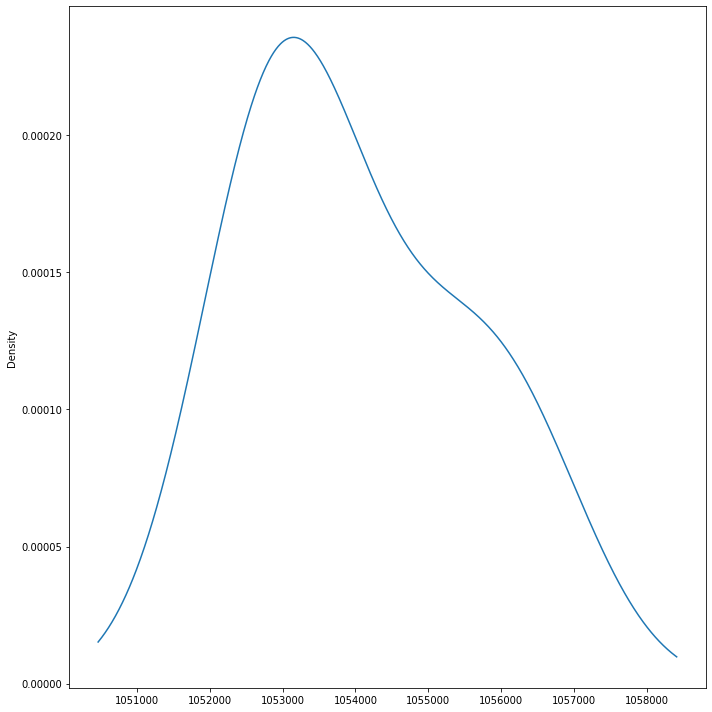

In [106]:
train_df.Population.plot(kind="kde", figsize = (10,10))
plt.tight_layout()
print(f" Mean: {train_df.Population.mean()} \n Skewness: {train_df.Population.skew()}")

#Conclusion: The training data set is skewed right. Perform transformation (Log transformation) on data to normalize it

Mean Log Population: 13.86813398043753 
 Skewness: 0.7396367159301142


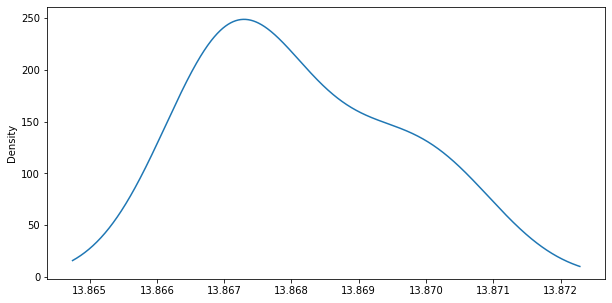

In [110]:
log_train_np = train_df
log_train_np["LogPop"] = np.log(train_df.Population)
log_train_np.LogPop.plot(kind="kde", figsize=(10,5))

print(f"Mean Log Population: {log_train_np.LogPop.mean()} \n Skewness: {log_train_np.LogPop.skew()}" )

# Conclusion: Log transformation still results in significant skewness of population. try other Transformation


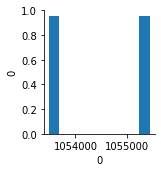

In [183]:
#log_train_np["SqrtPop"] = np.sqrt(train_df.Population)



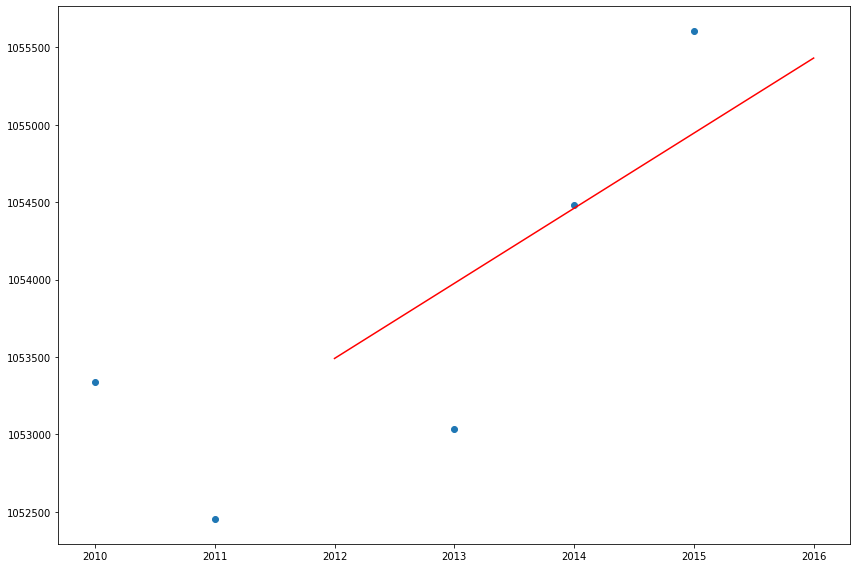

 Training Score: 0.6376401281055103 
 Test Score: 0.7847201646987295


In [118]:
from sklearn.metrics import r2_score

fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(X_train, y_train)
plt.plot(X_test,predicted, color="r")

plt.tight_layout()
plt.show()
print(f" Training Score: {lr_model.score(X_train, y_train)} \n Test Score: {r2_score(y_test, predicted)}")

In [119]:
print(f" Non Std. Model Test Score: {r2_score(y_test, predicted)} \n Std. Model Test Score: {r2_score(y_test, output)}")

 Non Std. Model Test Score: 0.7847201646987295 
 Std. Model Test Score: 0.7847201646987295


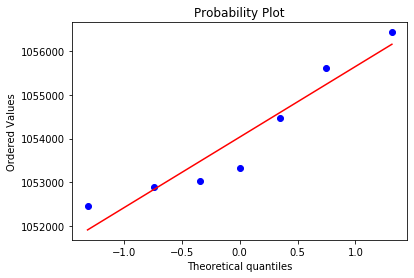

In [121]:
# Generate Q-Q plot

import scipy.stats as stats
stats.probplot(train_df["Population"], dist="norm", plot=plt)
plt.show()

In [123]:
# Test for multicollinearity 

corr = train_df.corr()
corr.style.background_gradient(cmap="coolwarm")

,Year,Population,LogPop
Year,1,0.876934,0.876913
Population,0.876934,1,1
LogPop,0.876913,1,1


In [124]:
train_df["ScalePop"] = sklearn.preprocessing.scale(train_df["Population"].astype("float64"))
train_df

,Year,Population,LogPop,ScalePop
0,2010,1053337,13.86747,-0.49842
1,2011,1052451,13.86663,-1.13238
2,2012,1052901,13.86706,-0.81039
3,2013,1053033,13.86719,-0.71594
4,2014,1054480,13.86856,0.31943
5,2015,1055607,13.86963,1.12584
6,2016,1056426,13.87040,1.71186


Mean Log Population: 4.7644428085342435e-14 
 Skewness: 0.7408579892538143


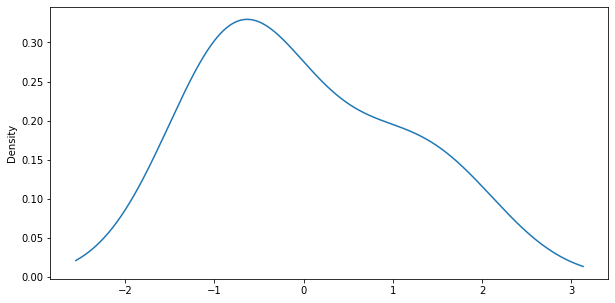

In [125]:
train_df.ScalePop.plot(kind="kde", figsize=(10,5))

print(f"Mean Log Population: {train_df.ScalePop.mean()} \n Skewness: {train_df.ScalePop.skew()}" )

# Conclusion: Log transformation still results in significant skewness of population. try other Transformation

In [126]:
from sklearn.preprocessing import MinMaxScaler

mmscale = MinMaxScaler()

In [128]:
X_train_mmscale = mmscale.fit_transform(X_train)
X_test_mmscale = mmscale.transform(X_test)

X_train_mmscale, X_test_mmscale

(array([[0.2],
        [0.6],
        [0. ],
        [1. ],
        [0.8]]), array([[1.2],
        [0.4]]))

In [129]:
lr_model_mm = LinearRegression()
lr_model_mm.fit(X_train_mmscale, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [132]:
predicted_mm = lr_model_mm.predict(X_test_mmscale)

In [135]:
print(f""" Non Std. Model Test Score: {r2_score(y_test, predicted)} \n 
           Stdized. Model Test Score: {r2_score(y_test, output)} \n
           MinMax Scaled Model Test Score: {r2_score(y_test, predicted_mm)}""")  # Conclusion: No impact on performance

 Non Std. Model Test Score: 0.7847201646987295 
 
           Stdized. Model Test Score: 0.7847201646987295 

           MinMax Scaled Model Test Score: 0.7847201646988041
